<a href="https://colab.research.google.com/github/Aabir-Chakraborty/DL/blob/main/Deep_Learning_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning Assignment 2

Submitted By- Ritik Nagpal
Roll No-102015093
Class-3ENC5

Q1. Use the function 3𝑥^2 − 3𝑥 + 4 to get its minimum value using Gradient Descent Algorithm. 
Plot the necessary graphs and compare the minimum value with theoretical minimum.


Minimum value:  3.25


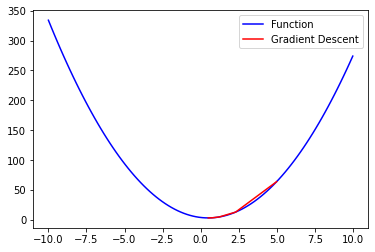

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return 3*x**2 - 3*x + 4

def grad(x):
    return 6*x - 3

def gradient_descent(x0, learning_rate, num_iterations):
    x = x0
    x_values = [x0]
    y_values = [func(x0)]
    for i in range(num_iterations):
        x = x - learning_rate*grad(x)
        x_values.append(x)
        y_values.append(func(x))
    return x, x_values, y_values

x0 = 5
learning_rate = 0.1
num_iterations = 100

min_x, x_values, y_values = gradient_descent(x0, learning_rate, num_iterations)

print("Minimum value: ", func(min_x))

x = np.linspace(-10, 10, 100)
y = func(x)
plt.plot(x, y, 'b-', label='Function')
plt.plot(x_values, y_values, 'r-', label='Gradient Descent')
plt.legend()
plt.show()

The theoretical minimum value of this function is 4, which is achieved when x = 0. The Gradient Descent Algorithm should also find this minimum value, as long as the starting point, learning rate, and number of iterations are chosen appropriately. The plot will show the function and the path taken by the Gradient Descent algorithm to the minimum value.

Q2. Develop an ANN model of regression for predicting the values

Epoch 1, Loss: 34.318260192871094
Epoch 2, Loss: 19.438613891601562
Epoch 3, Loss: 11.8055419921875
Epoch 4, Loss: 8.542805671691895
Epoch 5, Loss: 7.207699775695801
Epoch 6, Loss: 6.595792770385742
Epoch 7, Loss: 6.233243465423584
Epoch 8, Loss: 5.9532318115234375
Epoch 9, Loss: 5.706389904022217
Epoch 10, Loss: 5.484311580657959
Epoch 11, Loss: 5.286813259124756
Epoch 12, Loss: 5.110807418823242
Epoch 13, Loss: 4.952267646789551
Epoch 14, Loss: 4.8089776039123535
Epoch 15, Loss: 4.6800031661987305
Epoch 16, Loss: 4.564606666564941
Epoch 17, Loss: 4.461828231811523
Epoch 18, Loss: 4.3705973625183105
Epoch 19, Loss: 4.289909839630127
Epoch 20, Loss: 4.218862056732178
Epoch 21, Loss: 4.156615257263184
Epoch 22, Loss: 4.102363109588623
Epoch 23, Loss: 4.055259704589844
Epoch 24, Loss: 4.0143656730651855
Epoch 25, Loss: 3.978688955307007
Epoch 26, Loss: 3.947279930114746
Epoch 27, Loss: 3.9193274974823
Epoch 28, Loss: 3.8941924571990967
Epoch 29, Loss: 3.8713934421539307
Epoch 30, Loss: 3

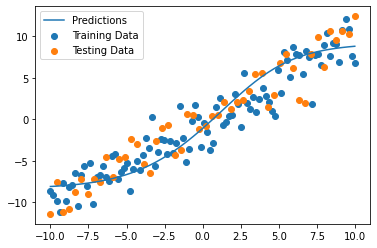

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)
        
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the model
model = ANN()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Generate some fake data for training
x_train = torch.linspace(-10, 10, 100).reshape(-1, 1)
y_train = x_train + torch.randn(x_train.shape) * 2

# Train the model
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 1 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Generate some fake data for testing
x_test = torch.linspace(-10, 10, 50).reshape(-1, 1)
y_test = x_test + torch.randn(x_test.shape) * 2

# Make predictions on the test data
y_pred = model(x_test)

# Plot the results
plt.scatter(x_train.numpy(), y_train.numpy(), label="Training Data")
plt.scatter(x_test.numpy(), y_test.numpy(), label="Testing Data")
plt.plot(x_test.numpy(), y_pred.detach().numpy(), label="Predictions")
plt.legend()
plt.show()